El objetivo de este notebook es plotear y analizar tiempos / spikes de experimentos. Por un lado cargamos un archivo donde se indica el tiempo de activación del láser, y por otro tenemos los spikes. Tenemos que plotear primero, de manera coordinada, la información de ambos archivos.

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import time
import datetime as dt
import os
import seaborn as sns

In [56]:
hoy = dt.date.today()

In [57]:
df_times = pd.read_csv('tiempos.csv', sep=', ', header=None, index_col=0)
#df_times

C:\Users\ane\AppData\Local\Temp\ipykernel_16188\936114925.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_times = pd.read_csv('tiempos.csv', sep=', ', header=None, index_col=0)


In [65]:
exp_date = '2024_02_20'

name_sample = 'D19_POSTsiembra_A1_(I)(001)'
name_file_spikes = f'{name_sample}_spike_list.csv'
name_file_laser = '202402020_MEAs_A1_(I).csv'

timestamp = [int(i) for i in df_times[1].loc[name_sample].split(':')]

time_absolute_start = dt.datetime.combine(hoy, dt.time(timestamp[0], timestamp[1], timestamp[2], timestamp[3] * 1000))  # A1_(IV)_(000)

os.makedirs(f'../../results/{exp_date}', exist_ok=True)


time_absolute_start

datetime.datetime(2024, 2, 28, 10, 25, 6, 151000)

In [59]:
df_spikes = pd.read_csv(f"../../spike_lists/{exp_date}/{name_file_spikes}", sep='\t', encoding='unicode_escape')
df_spikes

,Investigator,Unnamed: 1,Time (s),Electrode,Amplitude (mV)
0,Recording Name,D19_POSTsiembra_A1_(I),0.42200,A1_24,0.019
1,Description,NaN,0.60480,A1_24,0.019
2,Maestro Edge (Maestro-091) Settings,NaN,0.64080,A1_22,0.015
3,Original File Time,02/20/2024 10:25:06,0.76328,A1_24,0.022
4,Sampling Frequency,12.5 kHz,0.83904,A1_13,0.017
...,...,...,...,...,...
26601,NaN,NaN,202.03480,A1_24,0.019
26602,NaN,NaN,202.09984,A1_24,0.020
26603,NaN,NaN,202.14688,A1_22,0.015
26604,NaN,NaN,202.15736,A1_24,0.021


In [60]:

df_spikes['electrode_str'] = [i.split('_')[1] for i in df_spikes['Electrode']]
df_spikes['electrode_coord'] = [(int(electrode[0])-1, 3-(int(electrode[1])-1)) for electrode in df_spikes['electrode_str']]
df_spikes

,Investigator,Unnamed: 1,Time (s),Electrode,Amplitude (mV),electrode_str,electrode_coord
0,Recording Name,D19_POSTsiembra_A1_(I),0.42200,A1_24,0.019,24,"(1, 0)"
1,Description,NaN,0.60480,A1_24,0.019,24,"(1, 0)"
2,Maestro Edge (Maestro-091) Settings,NaN,0.64080,A1_22,0.015,22,"(1, 2)"
3,Original File Time,02/20/2024 10:25:06,0.76328,A1_24,0.022,24,"(1, 0)"
4,Sampling Frequency,12.5 kHz,0.83904,A1_13,0.017,13,"(0, 1)"
...,...,...,...,...,...,...,...
26601,NaN,NaN,202.03480,A1_24,0.019,24,"(1, 0)"
26602,NaN,NaN,202.09984,A1_24,0.020,24,"(1, 0)"
26603,NaN,NaN,202.14688,A1_22,0.015,22,"(1, 2)"
26604,NaN,NaN,202.15736,A1_24,0.021,24,"(1, 0)"


In [61]:
df_laser = pd.read_csv(f"../../tiempos_structura/{exp_date}/{name_file_laser}", sep=',')
df_laser

,Unnamed: 0,Repetition,ON duration (ms),Laser Power (mW),Turn ON Laser Time,Turn OFF Laser Time,Turn ON Laser Time (ms)
0,0,1,100,0,10:25:09.482706,10:25:09.585986,0 days 00:00:00.103280
1,1,2,100,0,10:25:12.607963,10:25:12.720310,0 days 00:00:00.112347
2,2,3,100,0,10:25:15.749355,10:25:15.859343,0 days 00:00:00.109988
3,3,4,100,0,10:25:18.879931,10:25:18.981448,0 days 00:00:00.101517
4,4,5,100,0,10:25:22.006421,10:25:22.108088,0 days 00:00:00.101667
5,5,6,100,0,10:25:25.136332,10:25:25.246293,0 days 00:00:00.109961
6,6,7,100,0,10:25:28.275583,10:25:28.375597,0 days 00:00:00.100014
7,7,8,100,0,10:25:31.402493,10:25:31.503706,0 days 00:00:00.101213
8,8,9,100,0,10:25:34.529647,10:25:34.638006,0 days 00:00:00.108359
9,9,10,100,0,10:25:37.663592,10:25:37.773557,0 days 00:00:00.109965


In [66]:

df_laser['start_times'] = [((dt.datetime.combine(hoy, df_laser['Turn ON Laser Time'].iloc[i])) - time_absolute_start).total_seconds() for i in range(len(df_laser))]
df_laser['end_times'] = [(dt.datetime.combine(hoy, df_laser['Turn OFF Laser Time'].iloc[i]) - time_absolute_start).total_seconds() for i in range(len(df_laser))]
df_laser['duration'] = df_laser['ON duration (ms)'] / 1000
df_laser


TypeError: combine() argument 2 must be datetime.time, not str

KeyError: 'start_times'

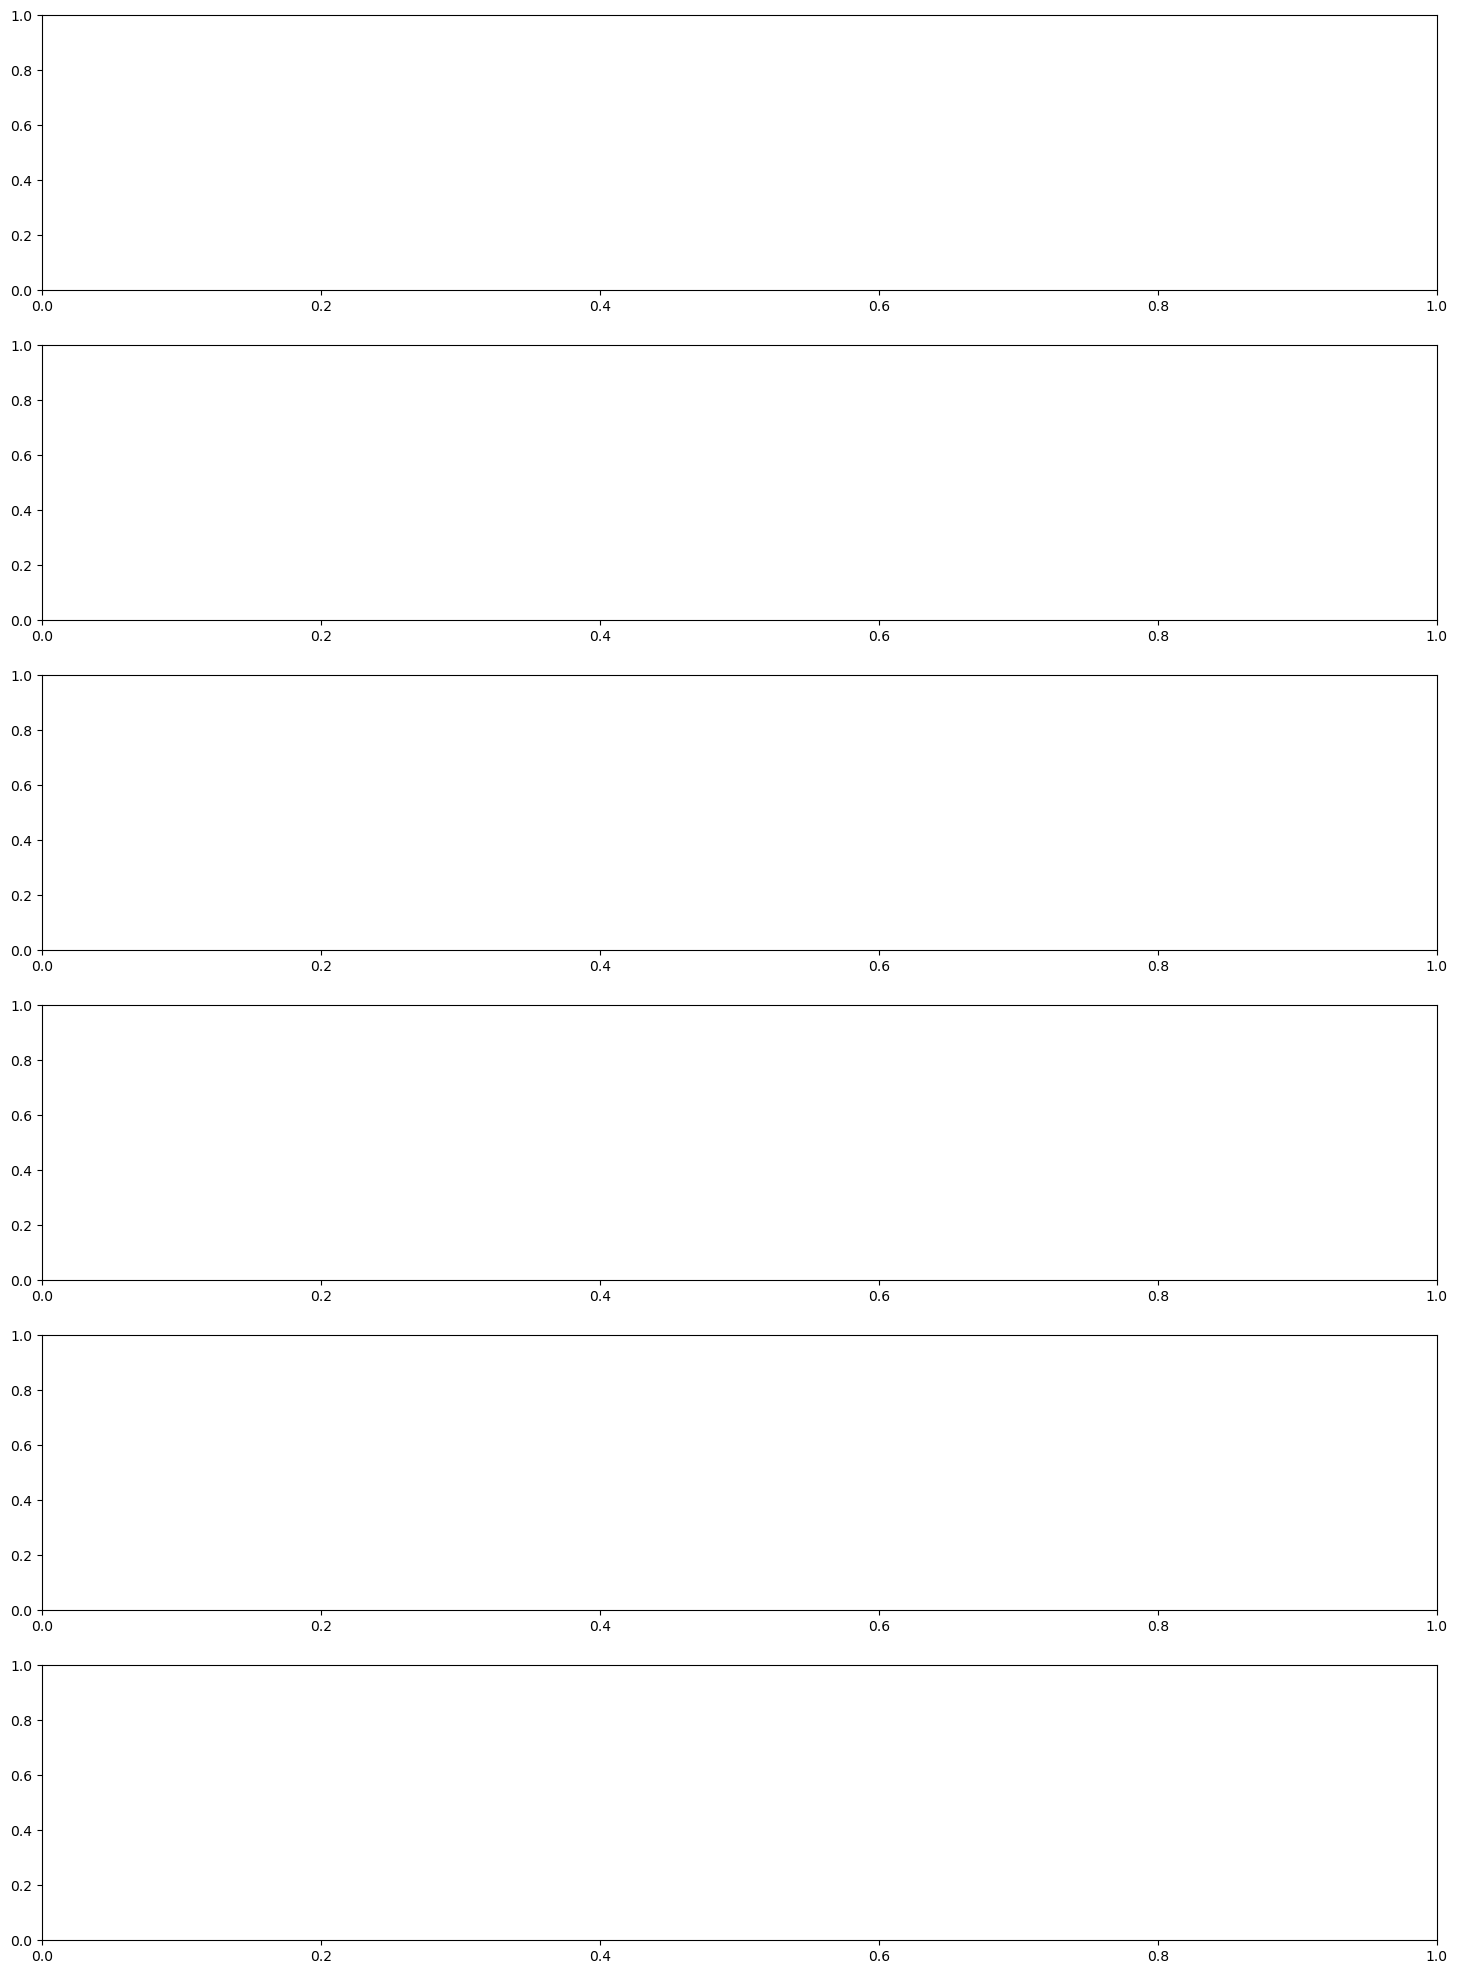

In [63]:
voltages = sorted(set(df_laser['Laser Power (mW)'].values))
electrodes = sorted(set(df_spikes['electrode_str'].values))

window = 3

fig, axs = plt.subplots(len(voltages), 1, figsize=(18, 25))

for idx, voltage in enumerate(voltages):
    df_laser_sub = df_laser[df_laser['Laser Power (mW)'] == voltage]
    t_0, t_f = min(df_laser_sub['start_times']), max(df_laser_sub['end_times'])


    for rep, start, end in zip(df_laser_sub['Repetition'].values, df_laser_sub['start_times'].values, df_laser_sub['end_times'].values):
        axs[idx].add_patch(mpl.patches.Rectangle((start, -1), end - start, len(electrodes)+1, alpha=0.25, color='#800000') )

    for electrode_idx, electrode in enumerate(electrodes):
        df_spikes_sub = df_spikes[(df_spikes['Time (s)'] > t_0 - window) & (df_spikes['Time (s)'] < t_f+window) & (df_spikes['electrode_str'] == electrode)]
        axs[idx].scatter(x=df_spikes_sub['Time (s)'].values, y=[electrode_idx] * len(df_spikes_sub), marker='|', s=100, c='#7f7f7f')
    


    axs[idx].set_yticks(np.array(range(len(electrodes))))
    axs[idx].set_yticklabels(electrodes)
    axs[idx].set_ylim([-1, len(electrodes)])
    axs[idx].set_xlim([t_0 - window, t_f+window])
    axs[idx].tick_params(left = False) 
    axs[idx].set_xlabel('Time (s)')
    axs[idx].set_ylabel('Electrodes')

    axs[0].title.set_text('0 mW')
    axs[1].title.set_text('20 mW')
    axs[2].title.set_text('40 mW')
    axs[3].title.set_text('60 mW')
    axs[4].title.set_text('80 mW')
    axs[5].title.set_text('100 mW')
    

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)



plt.savefig(f'../../results/{exp_date}/{name_sample}.png', dpi=300)

# Calculating the mean representation time between pulses

In [ ]:
tw = 0.1

time_ranges = np.arange(np.min(df_laser['start_times']) , np.max(df_laser['end_times']) , tw)
time_ranges_mean = (time_ranges[1:] + time_ranges[:-1]) * 0.5 

counts = np.array([len(df_spikes[(df_spikes['Time (s)'] >= start) & (df_spikes['Time (s)'] < end)]) for start, end in zip(time_ranges[:-1], time_ranges[1: ])])
len(counts)

In [ ]:
tmps = np.argwhere(counts > 80).flatten() * tw
diff = tmps[1: ] - tmps[: -1]
sns.swarmplot(diff[diff > 2 * tw])